## Import libraries and warnings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import data (.csv) as dataframe

In [3]:
df=pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


## Data Details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [5]:
df['release_date']=pd.to_datetime(df['release_date'])
df.drop(columns= ['Unnamed: 0'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

## Check Missing Values or Null Values

In [6]:
df.isna().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
df.shape

(1610, 17)

## Check Duplicate Values

In [8]:
df.duplicated().sum()

0

## Check Unique Values

In [9]:
df.nunique()

name                 954
album                 90
release_date          57
track_number          47
id                  1610
uri                 1610
acousticness         933
danceability         518
energy               511
instrumentalness    1134
liveness             757
loudness            1329
speechiness          655
tempo               1424
valence              701
popularity            69
duration_ms         1320
dtype: int64

In [10]:
#Dropping the 'id' and 'uri' columns as they have only unique values, which are of no use.
df.drop(columns= ['id','uri'], inplace=True) 

In [11]:
#Convert the 'track_number' column into categories, as it has only repetitive values and does not require any data cleaning treatment.
df['track_number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64)

In [12]:
df['track_number'] = df['track_number'].astype('category')
df['track_number'].unique()

[1, 2, 3, 4, 5, ..., 43, 44, 45, 46, 47]
Length: 47
Categories (47, int64): [1, 2, 3, 4, ..., 44, 45, 46, 47]

In [13]:
df.describe()

,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,NaN,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


## Outlier Treatment

### Checking Outliers

In [14]:
# Find the total number of columns that may have outliers
cols = df.select_dtypes(include = 'number').columns #Select all the columns with numbers ('float' or 'int' data type) 
len(cols)

11

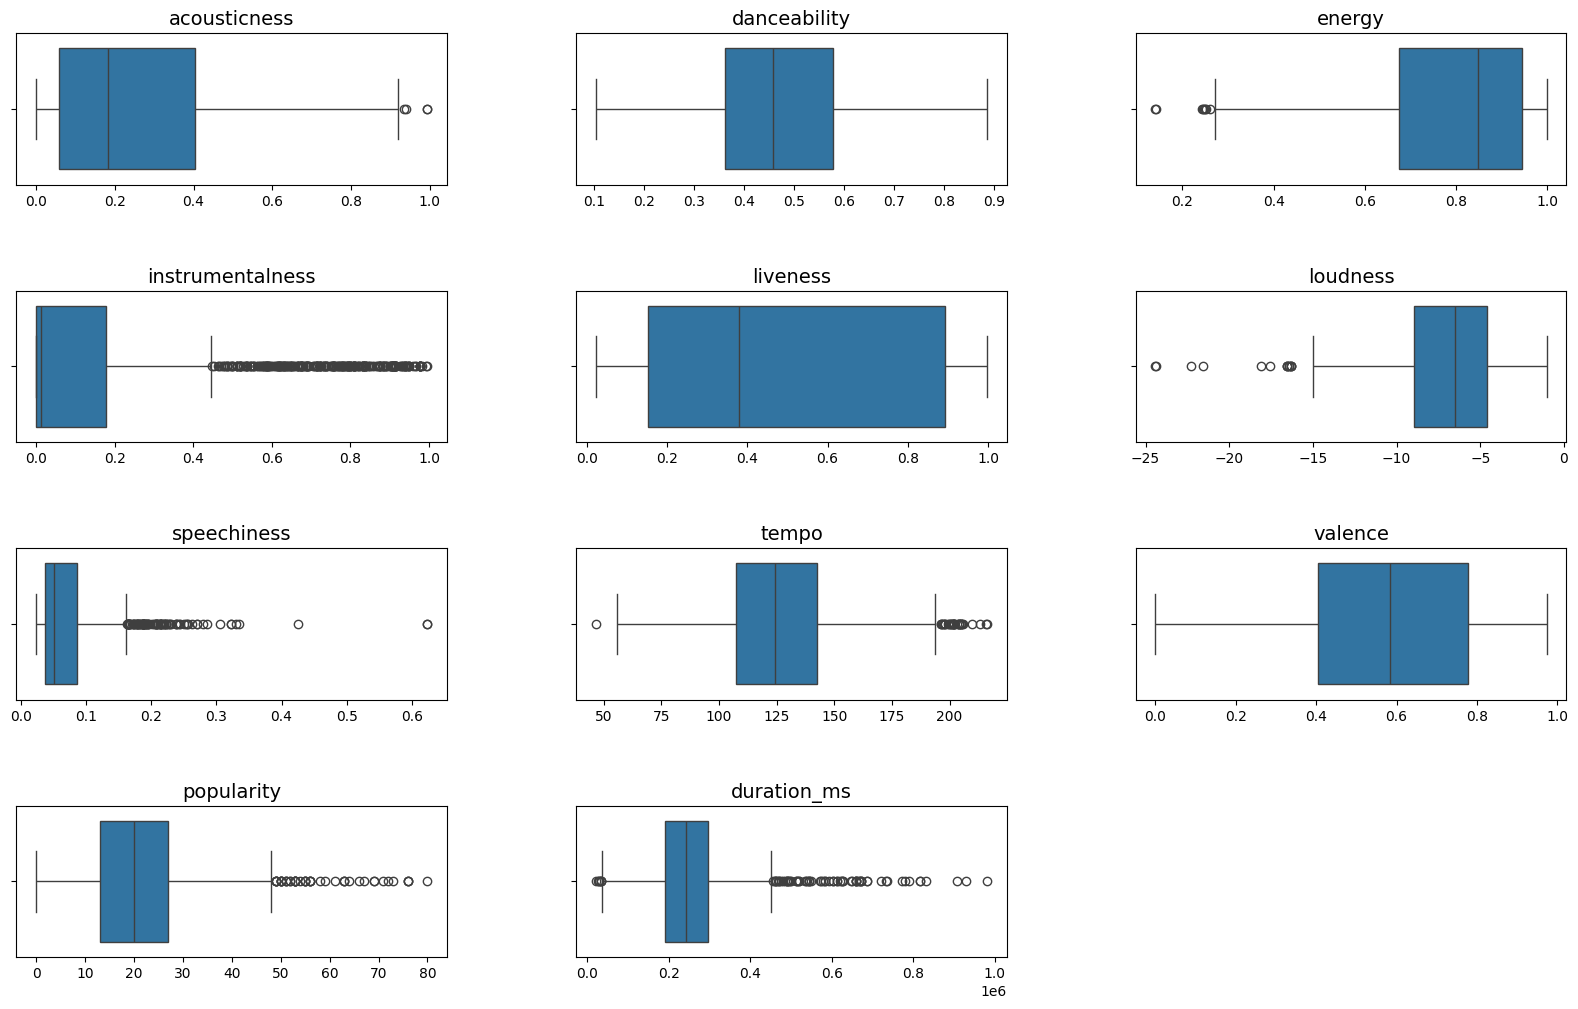

In [15]:
fig, ax = plt.subplots(4, 3, figsize = (20,12)) #Create subplots with 4 rows and 3 columns, each subplot measuring 20 by 12 inches.
k = 0
for i in range(4): #for 4 rows # Divided 11 variables into 4*3 matrix.
    for j in range(3): #for 3 columns
        if len(cols) == k: #for 12th empty box
            ax[i,j].axis("off") 
            break
        sns.boxplot(x = cols[k], data = df, ax = ax[i,j])
        ax[i,j].set_title(cols[k], size = 14) #Select Column name as a title.
        ax[i,j].set_xlabel('') # To make X-label empty
        k += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.7) #Adjuested Height & width padding between subplots

### Calculation of Outliers

In [16]:
# Define Function to calculate Outliers
def outliers(x):
    q1,q3=x.quantile([0.25,0.75])
    iqr=q3-q1
    min_value=q1-1.5*iqr
    max_value=q3+1.5*iqr
    return min_value,max_value

### Clipping of Outliers

In [17]:
for i in cols:
    min_value, max_value = outliers(df[i])
    df[i] = np.where(df[i] < min_value, min_value, 
            np.where(df[i] > max_value, max_value, df[i]))
df.describe()

,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,0.250366,0.468860,0.792575,0.115692,0.49173,-6.945452,0.066091,125.922829,0.582165,20.483851,251121.135714
min,1964-04-16 00:00:00,0.000009,0.104000,0.267500,0.000000,0.02190,-15.543125,0.023200,54.943250,0.000000,0.000000,33552.875000
25%,1970-09-04 00:00:00,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,0.921850,0.887000,0.999000,0.447171,0.99800,-1.014000,0.161750,194.803250,0.974000,48.000000,452379.875000
std,NaN,0.227061,0.141775,0.179177,0.170448,0.34910,2.890694,0.038636,28.798294,0.231253,11.504048,86189.545637


## Feature Engineering

### 1. Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.

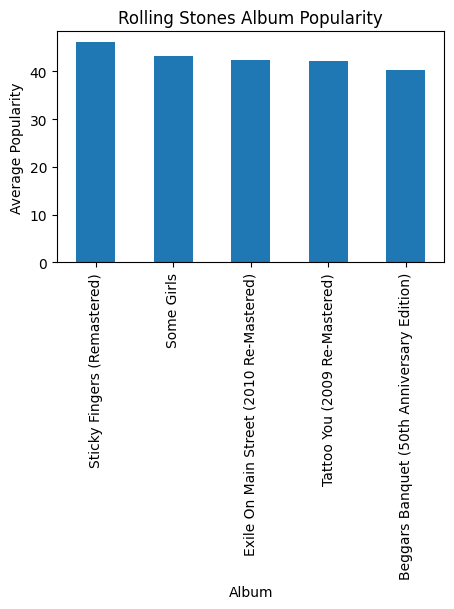

In [18]:
popular_album=df.groupby(['album'])['popularity'].mean().sort_values(ascending=False)[:5]
plt.figure(figsize=(5, 3))
popular_album.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.title('Rolling Stones Album Popularity')
plt.show()

##### Conclusion: 
##### Based on avg poplularity of an album top-2 albums are -
##### 1) Sticky Fingers (Remastered)
##### 2) Some Girls  

### 2. Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern

#### ⇒ Evolution of song features over time

###### Fetch 'Year' and 'Month' from 'release_date' column and then drop 'release_date' column.

In [19]:
df['year']=df.release_date.dt.year
df.drop(columns= ['release_date'], inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1610 non-null   object  
 1   album             1610 non-null   object  
 2   track_number      1610 non-null   category
 3   acousticness      1610 non-null   float64 
 4   danceability      1610 non-null   float64 
 5   energy            1610 non-null   float64 
 6   instrumentalness  1610 non-null   float64 
 7   liveness          1610 non-null   float64 
 8   loudness          1610 non-null   float64 
 9   speechiness       1610 non-null   float64 
 10  tempo             1610 non-null   float64 
 11  valence           1610 non-null   float64 
 12  popularity        1610 non-null   float64 
 13  duration_ms       1610 non-null   float64 
 14  year              1610 non-null   int32   
dtypes: category(1), float64(11), int32(1), object(2)
memory usage: 172.9+ KB

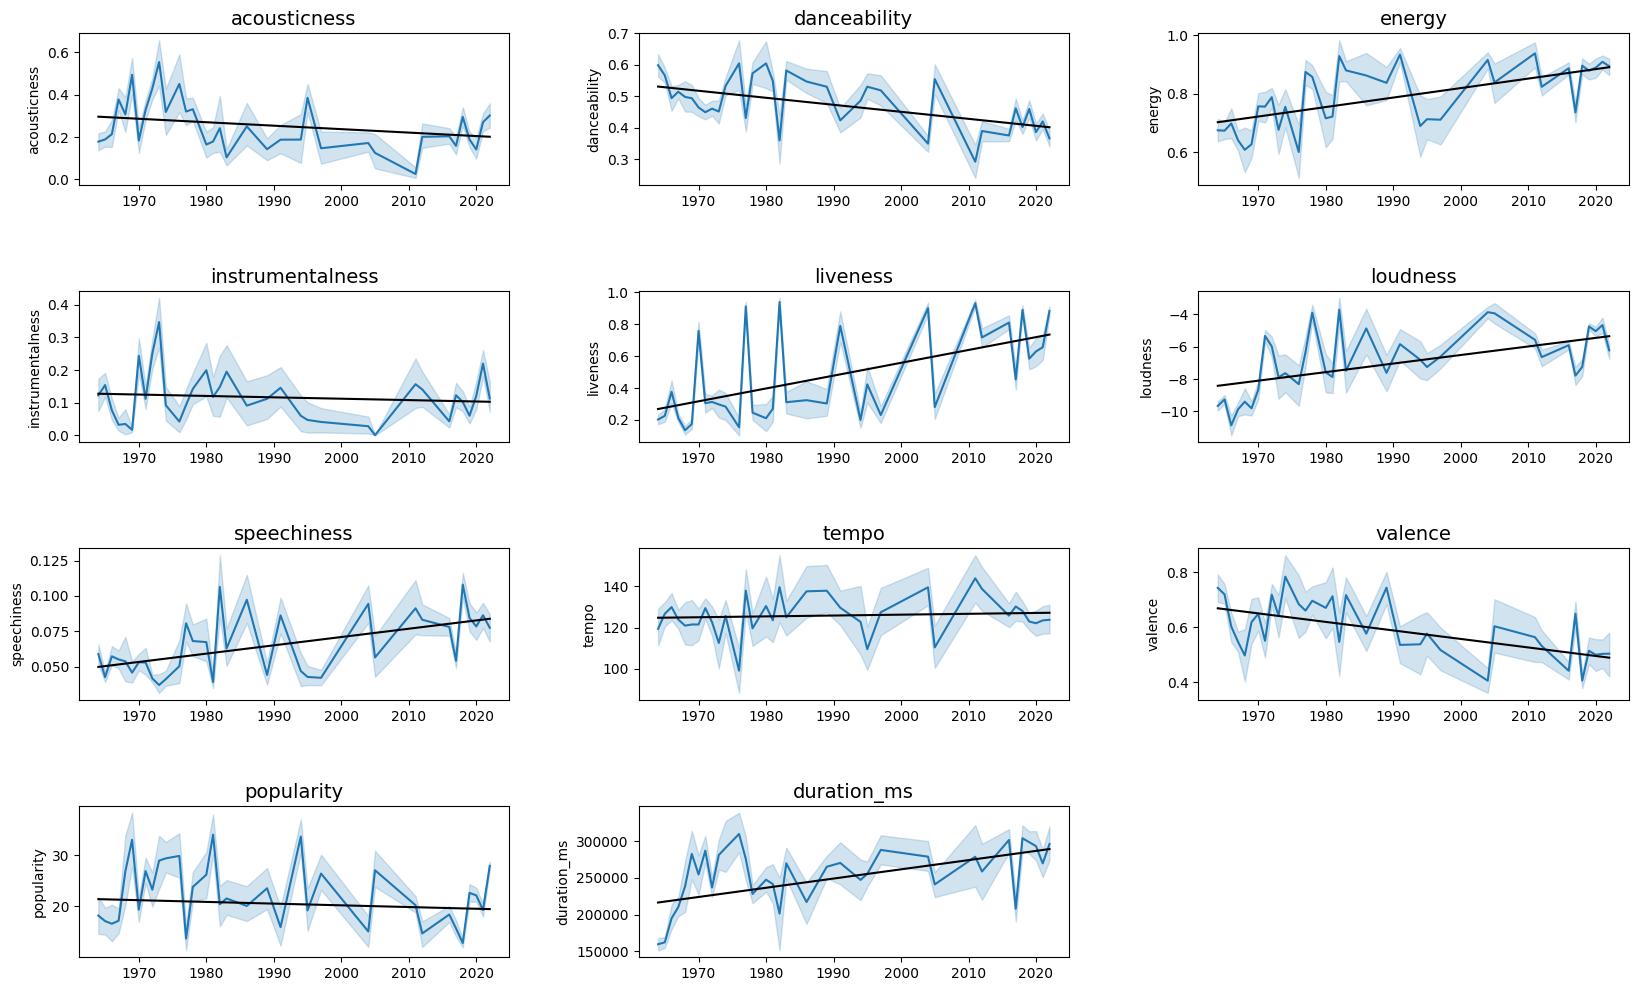

In [20]:
fig, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
    for j in range(3):
        if len(cols) == k: 
            ax[i,j].axis("off") 
            break
        sns.lineplot(x = 'year', y = cols[k], data=df, ax = ax[i,j])
        z = np.polyfit(df['year'], df[cols[k]], 1)
        p = np.poly1d(z)
        ax[i, j].plot(df['year'],p(df['year']),"k")
        ax[i,j].set_title(cols[k], size = 14)
        ax[i,j].set_xlabel('')  
        k += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

##### Conclusion: 
##### There is an increasing trend in energy, liveliness, loudness, speechiness and duration over the years.
##### There is a decreasing trend in danceability and valence over the years.
##### Acousticness, instrumentalness, tempo and popularity remains constant over the years.

#### ⇒ The correlation between various song features

<Axes: >

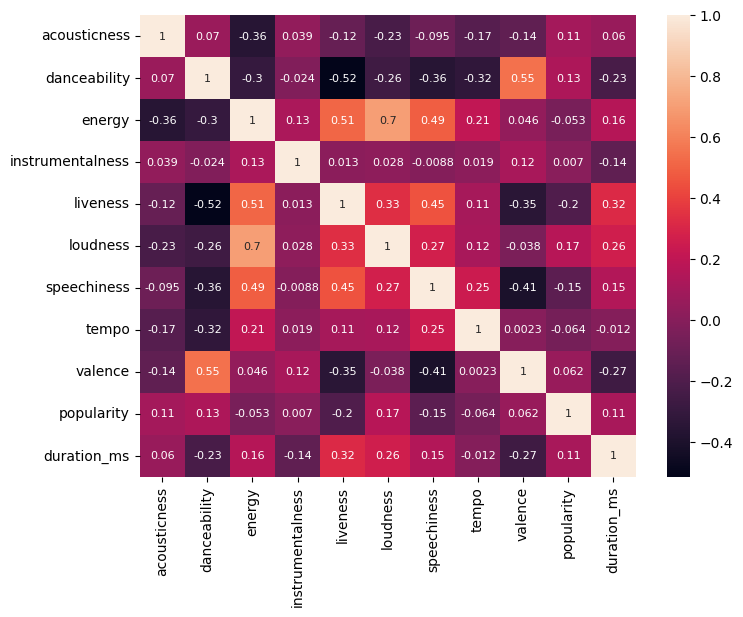

In [21]:
corr_cols = df.select_dtypes(include=[float]).columns
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

### 3. Discover how a song's popularity relates to various factors and how this has changed over time.

#### ⇒ Do albums with more songs gain more popularity than those with Fewer Songs?

In [22]:
album_stats = df.groupby('album').agg({'name': 'count', 'popularity': 'mean'})
album_stats.rename(columns={'name': 'no. of songs', 'popularity': 'avg_popularity'}, inplace=True)
album_stats

,no. of songs,avg_popularity
album,,
12 X 5,12,32.083333
12 x 5,12,5.000000
A Bigger Bang (2009 Re-Mastered),16,27.062500
A Bigger Bang (Live),22,18.181818
Aftermath,11,38.727273
...,...,...
Undercover,10,18.000000
Undercover (2009 Re-Mastered),10,25.100000
Voodoo Lounge (Remastered 2009),15,33.666667


In [23]:
correlation = album_stats['no. of songs'].corr(album_stats['avg_popularity'])
correlation

-0.17487116238994727

##### Conclusion: 
##### Since the correlation between no.of songs and average popularity is negative, it means that albums with a lower song count tend to be more popular.

#### ⇒ Most Popular Album by Year

In [24]:
df.groupby(df['year']).agg({'popularity': 'max', 'album': 'first'})

,popularity,album
year,,
1964,48.0,12 x 5
1965,48.0,December’s Children (And Everybody’s)
1966,48.0,got LIVE if you want it!
1967,48.0,Their Satanic Majesties Request
1968,48.0,Beggars Banquet (50th Anniversary Edition)
1969,48.0,Let It Bleed (50th Anniversary Edition / Remas...
1970,37.0,Get Yer Ya Yas Out
1971,48.0,Sticky Fingers (Remastered)
1972,48.0,Exile On Main Street (2010 Re-Mastered)


#### ⇒ Most Popular Song by Year

In [25]:
df.groupby(df['year']).agg({'popularity': 'max', 'name': 'first'})

,popularity,name
year,,
1964,48.0,Around And Around
1965,48.0,She Said Yeah - Remastered 2002
1966,48.0,Under My Thumb - Live
1967,48.0,Sing This All Together
1968,48.0,Sympathy For The Devil - 50th Anniversary Edition
1969,48.0,Gimme Shelter - Remastered 2019
1970,37.0,Jumpin' Jack Flash - Live
1971,48.0,Brown Sugar - 2009 Remaster
1972,48.0,Rocks Off


#### ⇒ Over all Most Popular Song

In [26]:
max_popularity=df['popularity'].max()
print('Max Popularity:',max_popularity)
most_popular_song=df.loc[df['popularity'] == max_popularity]
print(most_popular_song[['name', 'year']])

Max Popularity: 48.0
                                                   name  year
235                                      Doom And Gloom  2019
671                               Anybody Seen My Baby?  1997
684                  Anybody Seen My Baby? - Remastered  1997
724                                      Love Is Strong  1994
810                    Harlem Shuffle - Remastered 2009  1986
862                       Start Me Up - Remastered 2009  1981
870                                 Heaven - Remastered  1981
872               Waiting On A Friend - Remastered 2009  1981
880                  Emotional Rescue - Remastered 2009  1980
881                          She's So Cold - Remastered  1980
893                               Miss You - Remastered  1978
901                   Beast Of Burden - Remastered 1994  1978
902                              Shattered - Remastered  1978
989                       Fool To Cry - Remastered 2009  1976
1001  It's Only Rock'n'Roll (But I Like It) - Rem

### 4. Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations

#### Due to the high number of numerical variables, we will employ Principal Component Analysis (PCA) as a dimensionality reduction technique.

In [81]:
data_std = sc.fit_transform(df.loc[:,'acousticness':'duration_ms'])
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(data_std)
pca_data = pca.transform(data_std)
pca_df = pd.DataFrame(pca_data, columns = ['PC{}'.format(i+1) for i in range(6)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.822186,0.478498,1.668891,2.121928,-0.091167,2.039259
1,-1.872676,0.509072,-0.895302,1.398785,0.465070,0.359185
2,-2.133075,0.284416,-0.711880,2.196867,0.249026,0.757027
3,-2.770433,1.750189,-0.981314,0.427079,0.445889,1.910846
4,-2.387283,1.198579,-1.067548,0.379010,0.419729,0.509249


In [82]:
pca_cols = df.loc[:,'acousticness':'duration_ms'].columns
remaining_cols = df.loc[:,~df.columns.isin(pca_cols)]
df1 = pd.concat([pca_df,remaining_cols] , axis = 1)
df1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,name,album,track_number,year
0,-0.822186,0.478498,1.668891,2.121928,-0.091167,2.039259,Concert Intro Music - Live,Licked Live In NYC,1,2022
1,-1.872676,0.509072,-0.895302,1.398785,0.465070,0.359185,Street Fighting Man - Live,Licked Live In NYC,2,2022
2,-2.133075,0.284416,-0.711880,2.196867,0.249026,0.757027,Start Me Up - Live,Licked Live In NYC,3,2022
3,-2.770433,1.750189,-0.981314,0.427079,0.445889,1.910846,If You Can't Rock Me - Live,Licked Live In NYC,4,2022
4,-2.387283,1.198579,-1.067548,0.379010,0.419729,0.509249,Don’t Stop - Live,Licked Live In NYC,5,2022


In [83]:
df1.drop(columns = ['name'], inplace = True)
df1_dummy = pd.get_dummies(df1, dtype=int)
df1_dummy

,PC1,PC2,PC3,PC4,PC5,PC6,year,album_12 X 5,album_12 x 5,album_A Bigger Bang (2009 Re-Mastered),...,track_number_38,track_number_39,track_number_40,track_number_41,track_number_42,track_number_43,track_number_44,track_number_45,track_number_46,track_number_47
0,-0.822186,0.478498,1.668891,2.121928,-0.091167,2.039259,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.872676,0.509072,-0.895302,1.398785,0.465070,0.359185,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-2.133075,0.284416,-0.711880,2.196867,0.249026,0.757027,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-2.770433,1.750189,-0.981314,0.427079,0.445889,1.910846,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-2.387283,1.198579,-1.067548,0.379010,0.419729,0.509249,2022,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.801914,-1.774428,0.227980,-0.570903,2.191042,0.216224,1964,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,0.272951,0.452083,-0.405183,-0.757439,0.573841,0.765050,1964,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1607,2.384890,-0.902735,-0.825965,-0.413349,-0.502573,1.652142,1964,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1608,2.472823,0.267026,0.221804,-0.608800,-0.126595,1.541648,1964,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Perform Cluster Analysis:
#### • Identify the right number of clusters

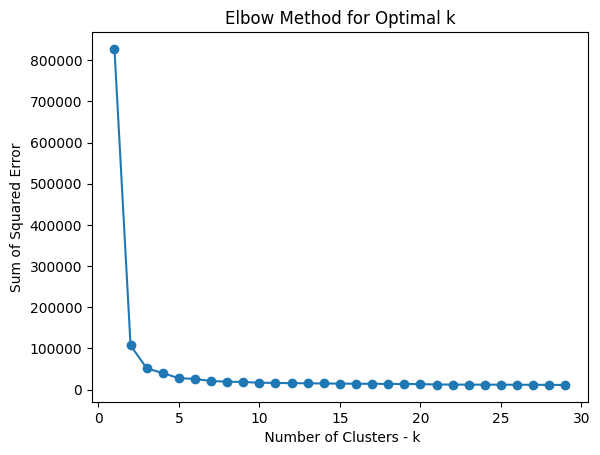

In [85]:
from sklearn.cluster import KMeans

sse = []
for k in range(1,30):
    km = KMeans(n_clusters = k, random_state=42)
    km.fit(df1_dummy)
    sse.append(km.inertia_)

plt.xlabel(' Number of Clusters - k')
plt.ylabel('Sum of Squared Error')
plt.title ('Elbow Method for Optimal k')
plt.plot(range(1,30), sse)
plt.scatter(range(1,30), sse)

#### • Use appropriate clustering algorithm

In [86]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(df1_dummy)
df1_dummy['cluster'] = km.labels_
clus_0 = df1_dummy.groupby('cluster').mean()
clus_0.insert(loc = 0 , column = 'size', value =df1_dummy.groupby('cluster').size() )
clus_0

,size,PC1,PC2,PC3,PC4,PC5,PC6,year,album_12 X 5,album_12 x 5,...,track_number_38,track_number_39,track_number_40,track_number_41,track_number_42,track_number_43,track_number_44,track_number_45,track_number_46,track_number_47
cluster,,,,,,,,,,,,,,,,,,,,,
0,231,-0.323526,-0.227724,-0.210304,-0.300023,0.014278,0.057617,1994.536797,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,771,0.959786,-0.029159,0.109981,0.114391,0.144991,0.024562,1970.267185,0.015564,0.015564,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,608,-1.094179,0.123497,-0.059564,-0.031070,-0.189287,-0.053037,2017.922697,0.000000,0.000000,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645


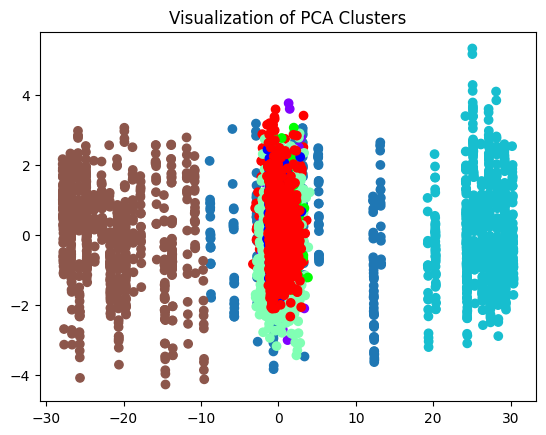

In [95]:
df1_dummy_reduced = pca.fit_transform(df1_dummy)
plt.scatter(df1_dummy_reduced[:, 0], df1_dummy_reduced[:, 1], c=df1_dummy['cluster'], cmap='tab10')
plt.scatter(df1_dummy_reduced[:, 2], df1_dummy_reduced[:, 3], c=df1_dummy['cluster'], cmap='rainbow')
plt.scatter(df1_dummy_reduced[:, 4], df1_dummy_reduced[:, 5], c=df1_dummy['cluster'], cmap='brg')
plt.title('Visualization of PCA Clusters')
plt.show()

### Clusters without PCA

In [34]:
df2 = df.drop(columns = 'name')
df2_dummy = pd.get_dummies(df2)
df2_dummy.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,...,track_number_38,track_number_39,track_number_40,track_number_41,track_number_42,track_number_43,track_number_44,track_number_45,track_number_46,track_number_47
0,0.0824,0.463,0.993,0.447171,0.932,-12.913,0.11000,118.001,0.0302,33.0,...,False,False,False,False,False,False,False,False,False,False
1,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.07590,131.455,0.3180,34.0,...,False,False,False,False,False,False,False,False,False,False
2,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.11500,130.066,0.3130,34.0,...,False,False,False,False,False,False,False,False,False,False
3,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.16175,132.994,0.1470,32.0,...,False,False,False,False,False,False,False,False,False,False
4,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.09300,130.533,0.2060,32.0,...,False,False,False,False,False,False,False,False,False,False


In [96]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(df2_dummy)
df2_dummy['cluster'] = km.labels_
clus_1 = df2_dummy.groupby('cluster').mean()
clus_1.insert(loc = 0 , column = 'size', value =df2_dummy.groupby('cluster').size() )
clus_1

,size,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,track_number_38,track_number_39,track_number_40,track_number_41,track_number_42,track_number_43,track_number_44,track_number_45,track_number_46,track_number_47
cluster,,,,,,,,,,,,,,,,,,,,,
0,749,0.247276,0.461182,0.828579,0.104369,0.539422,-6.131931,0.068647,125.005017,0.565105,...,0.0000,0.001335,0.001335,0.0000,0.001335,0.001335,0.001335,0.001335,0.001335,0.001335
1,625,0.238054,0.502525,0.743494,0.137537,0.364502,-8.111235,0.058388,126.972202,0.650032,...,0.0016,0.000000,0.000000,0.0016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,236,0.292780,0.404072,0.808288,0.093779,0.677303,-6.440000,0.078378,126.056657,0.456580,...,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### • Define each cluster based on the features

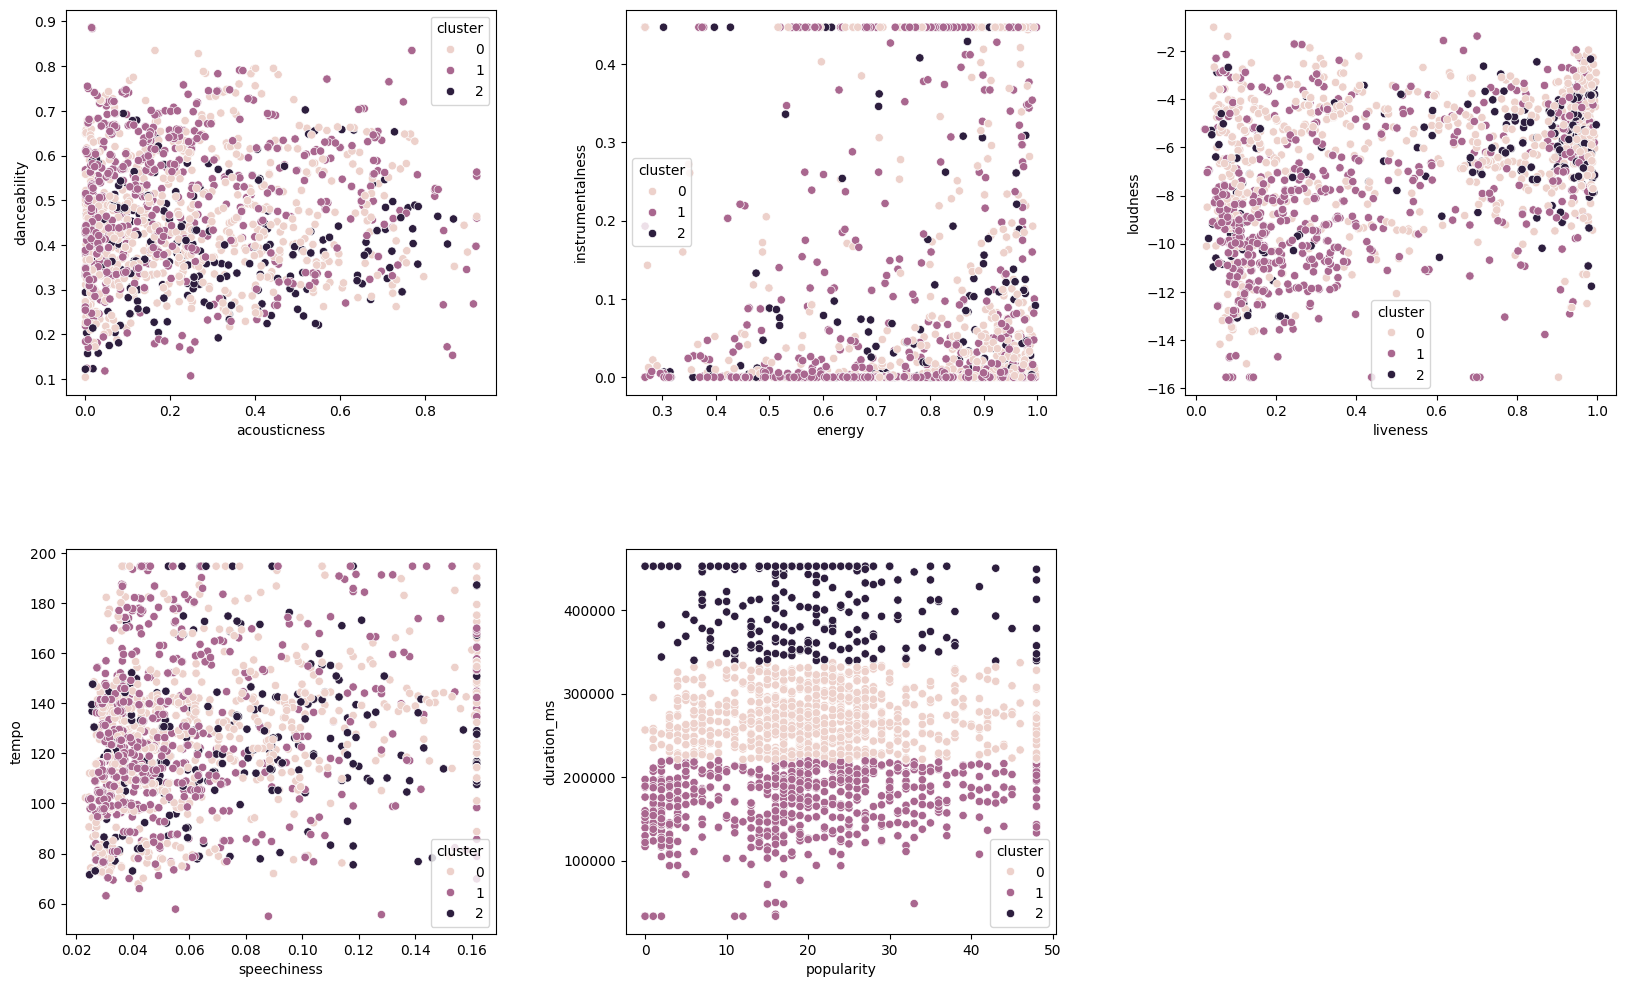

In [124]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
feature = [col for col in cols if col!= 'valence']
k=0
for i in range(2):
    for j in range(3):
        if len(feature) == k: 
            ax[i,j].axis("off") 
            break
        sns.scatterplot(data=df2_dummy, x=feature[k], y=feature[k+1], hue="cluster", ax = ax[i,j])
        ax[i,j].set_xlabel(feature[k])
        k+=2
        
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

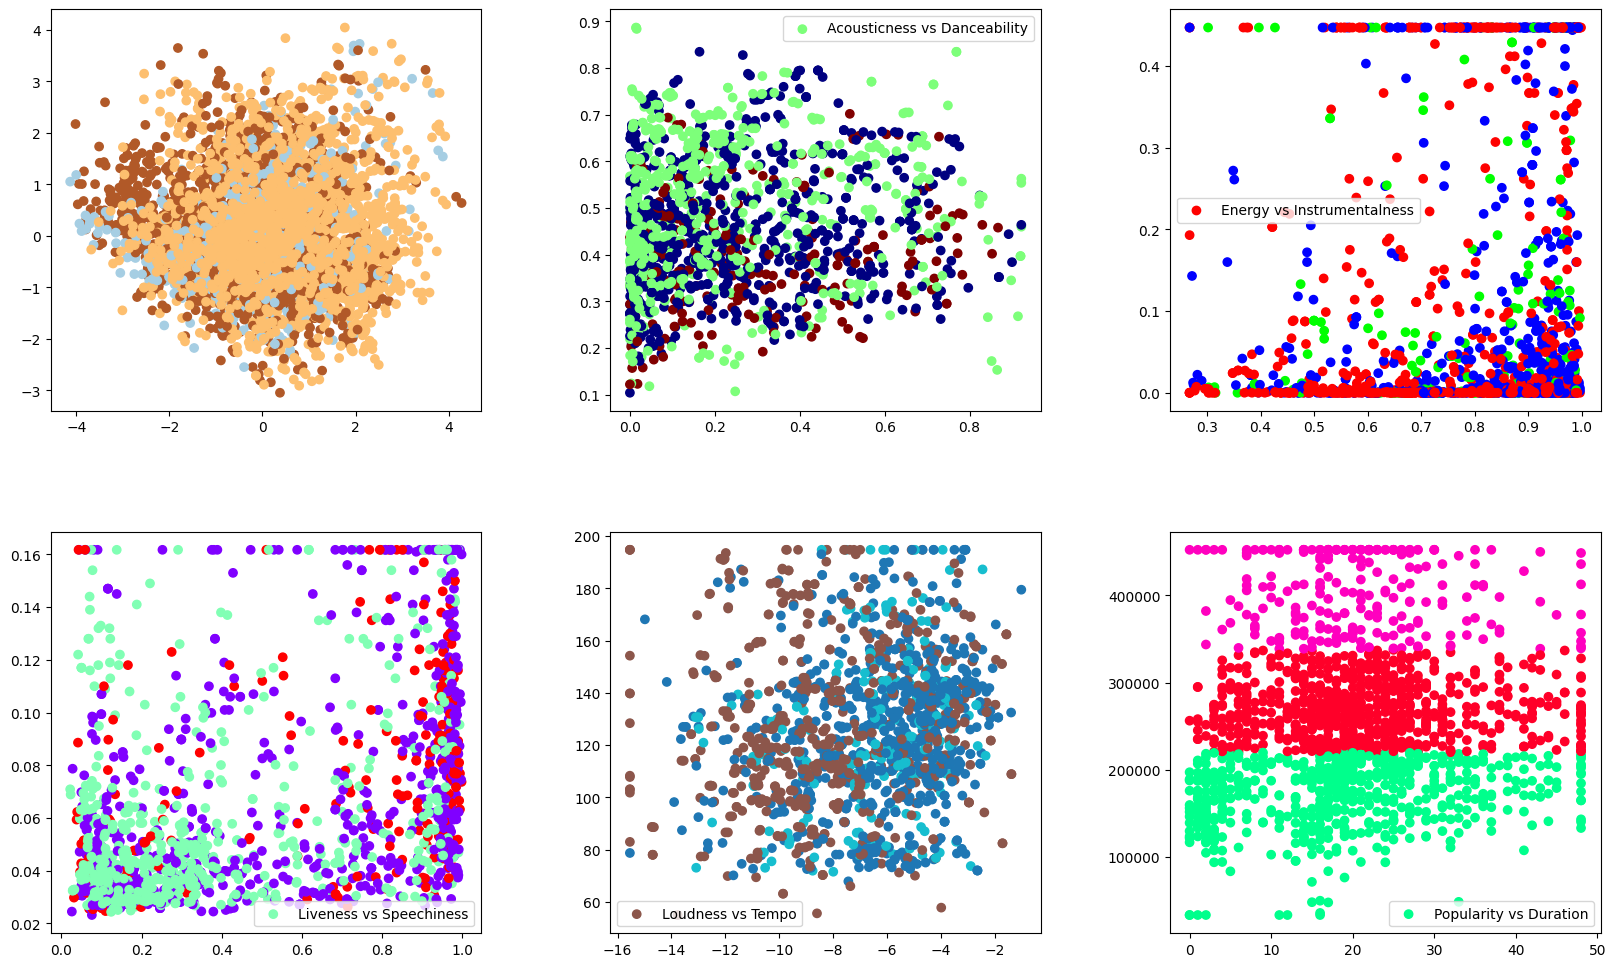

In [110]:
f, ax = plt.subplots(2, 3, figsize = (20,12))
ax[0,0].scatter(x=df1_dummy.PC1, y=df1_dummy.PC2, c=df1_dummy['cluster'], cmap='Paired')
ax[0,0].scatter(x=df1_dummy.PC3, y=df1_dummy.PC4, c=df1_dummy['cluster'], cmap='Paired')
ax[0,0].scatter(x=df1_dummy.PC5, y=df1_dummy.PC6, c=df1_dummy['cluster'], cmap='Paired')
ax[0,1].scatter(x = df2_dummy.acousticness, y=df2_dummy.danceability, c = df2_dummy['cluster'],cmap='jet', label='Acousticness vs Danceability')
ax[0,1].legend()
ax[0,2].scatter(x = df2_dummy.energy, y=df2_dummy.instrumentalness, c = df2_dummy['cluster'], cmap='brg', label='Energy vs Instrumentalness')
ax[0,2].legend()
ax[1,0].scatter(x = df2_dummy.liveness, y=df2_dummy.speechiness, c = df2_dummy['cluster'], cmap='rainbow', label='Liveness vs Speechiness')
ax[1,0].legend()
ax[1,1].scatter(x = df2_dummy.loudness, y=df2_dummy.tempo, c = df2_dummy['cluster'],cmap='tab10', label='Loudness vs Tempo')
ax[1,1].legend()
ax[1,2].scatter(x = df2_dummy.popularity, y=df2_dummy.duration_ms, c = df2_dummy['cluster'],cmap='gist_rainbow',label='Popularity vs Duration')
ax[1,2].legend()
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()